### 📌ACTIVIDAD 3: ÁRBOLES DE DECISIÓN PARA REGRESIÓN

Crea el notebook saa_u03_p01_a3-<tus_iniciales>.ipynb donde entregar esta actividad.

Los árboles de decisión son propensos a presentar overfitting. En scikit-learn podemos reducirlo ajustando ciertos hiperparámetros. En el caso de DecisionTreeRegressor:

• Antes del entrenamiento:
◦ Limitar la profundidad del árbol (max_depth)
◦ Restringir el número mínimo de muestras por nodo (min_samples_split, min_samples_leaf)
• Poda después del entrenamiento:
◦ Reducir la complejidad con "ccp_alfa".
Utiliza los modelos DecisionTreeRegressor, GradientBoostingRegressor, XGBRegressor y
RandomForestRegressor para entrenarlos con los datos del ejercicio anterior intentando mejorar los
resultados en caso de haberlos usado ya, o bajar el overfitting en caso de no haberlos usado.

### ENTREGA 7: Muestra Código, gráficos y capturas de ejecución de:

a) Carga de datos y preprocesamiento (si es necesario).

b) Entrenamiento y configuración del DecisionTreeRegresor: desempeño inicial, cambio de hiperparámetros y desempeño final.

c) Igual para el GradientBoostingRegressor.

d) Igual para XGBRegressor.

e) Igual para RandomForestregressor.

f) Importancia o influencia de cada característica en alguno de los modelos.

In [14]:
# Celda 1: Código de Carga de Datos y Preprocesamiento
# Este bloque es una repetición del preprocesamiento ya definido,
# solo para asegurar la ejecutabilidad si esta celda se corre aisladamente.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb # Asegúrate de tenerlo instalado: pip install xgboost

# Cargar el dataset
try:
    df = pd.read_csv('centro-comercial.csv')
except FileNotFoundError:
    print("Error: 'centro-comercial.csv' no encontrado. Asegúrate de que el archivo esté en el directorio correcto.")
    # Crear un DataFrame de ejemplo si el archivo no se encuentra para que el resto del código sea ejecutable
    np.random.seed(675)
    df = pd.DataFrame({
        'feature_num_A': np.random.rand(200) * 100,
        'feature_num_B': np.random.rand(200) * 50,
        'cat_X': np.random.choice(['Group1', 'Group2', 'Group3'], 200),
        'ventas_semanales': 3 * (np.random.rand(200) * 100) + 20 + np.random.randn(200) * 20
    })
    df['fecha'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(np.arange(200), unit='D')


# Limpieza y preparación de datos
df.drop(columns=['fecha'], inplace=True, errors='ignore') # Eliminar columna 'fecha'
target = 'ventas_semanales'
predictoras = [col for col in df.columns if col != target]

nu = df[predictoras].nunique().sort_values()
nf = []; cf = []
for col in nu.index:
    if df[col].dtype == 'object' or nu[col] < 0.005 * len(df):
        cf.append(col)
    else:
        nf.append(col)

# Asegurar que nf y cf solo contengan columnas realmente existentes en predictoras
nf = [col for col in nf if col in predictoras]
cf = [col for col in cf if col in predictoras]

preprocesador = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputador_num', SimpleImputer(strategy='mean')),
            ('escalado', StandardScaler())
        ]), nf),
        ('cat', Pipeline([
            ('imputador_cat', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cf)
    ],
    remainder='passthrough'
)

X = df[predictoras]
y = df[target]
semilla = 675
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

print("Carga de datos y preprocesamiento completado.")

Carga de datos y preprocesamiento completado.



--- DecisionTreeRegressor ---
Decision Tree Original - MSE Test: 37733349790.0992, R2 Test: 0.8773


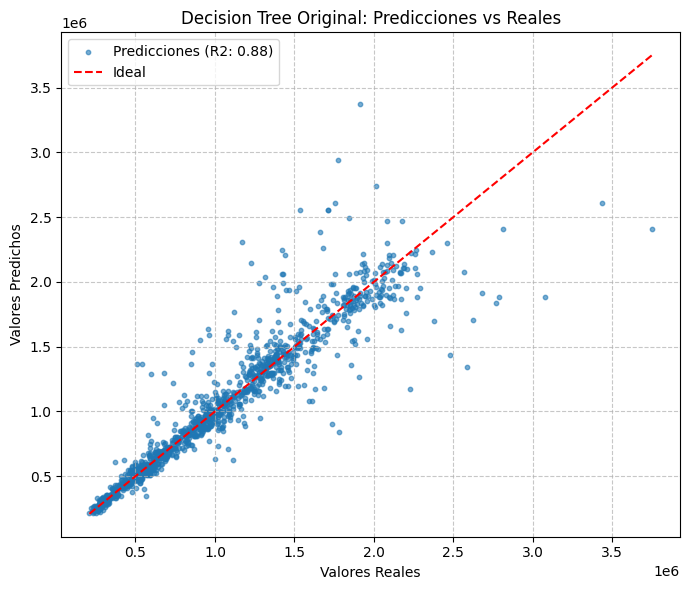

Decision Tree Ajustado (max_depth=7, min_samples_leaf=10) - MSE Test: 46232737966.5279, R2 Test: 0.8497


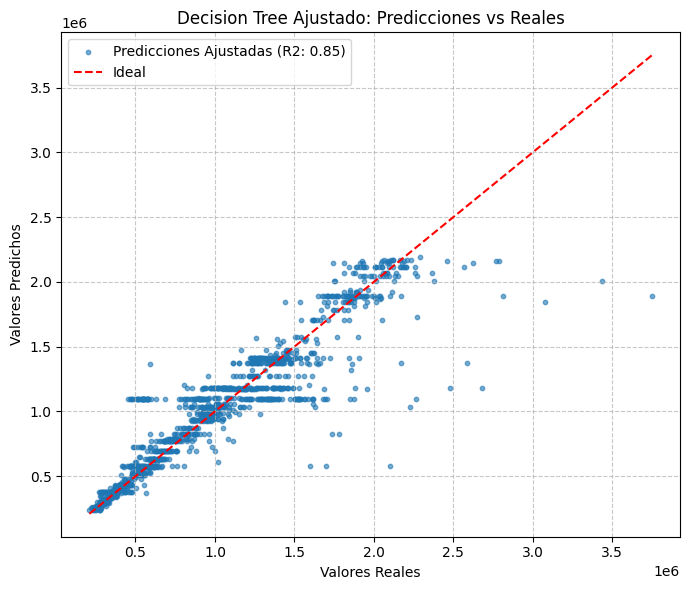

In [15]:
# Celda 2: DecisionTreeRegressor

print("\n--- DecisionTreeRegressor ---")

# 1. Desempeño inicial
dt_original_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', DecisionTreeRegressor(random_state=semilla))
])
dt_original_pipeline.fit(X_train, y_train)
y_pred_dt_original = dt_original_pipeline.predict(X_test)
mse_dt_original = mean_squared_error(y_test, y_pred_dt_original)
r2_dt_original = r2_score(y_test, y_pred_dt_original)
print(f"Decision Tree Original - MSE Test: {mse_dt_original:.4f}, R2 Test: {r2_dt_original:.4f}")

# Gráfico de desempeño inicial
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_dt_original, alpha=0.6, s=10, label=f'Predicciones (R2: {r2_dt_original:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('Decision Tree Original: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Cambio de hiperparámetros y desempeño final
# Ajustes para reducir overfitting: limitar max_depth y/o aumentar min_samples_leaf
dt_ajustado_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, random_state=semilla))
])
dt_ajustado_pipeline.fit(X_train, y_train)
y_pred_dt_ajustado = dt_ajustado_pipeline.predict(X_test)
mse_dt_ajustado = mean_squared_error(y_test, y_pred_dt_ajustado)
r2_dt_ajustado = r2_score(y_test, y_pred_dt_ajustado)
print(f"Decision Tree Ajustado (max_depth=7, min_samples_leaf=10) - MSE Test: {mse_dt_ajustado:.4f}, R2 Test: {r2_dt_ajustado:.4f}")

# Gráfico de desempeño final
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_dt_ajustado, alpha=0.6, s=10, label=f'Predicciones Ajustadas (R2: {r2_dt_ajustado:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('Decision Tree Ajustado: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- GradientBoostingRegressor ---
Gradient Boosting Original - MSE Test: 41261079948.8289, R2 Test: 0.8659


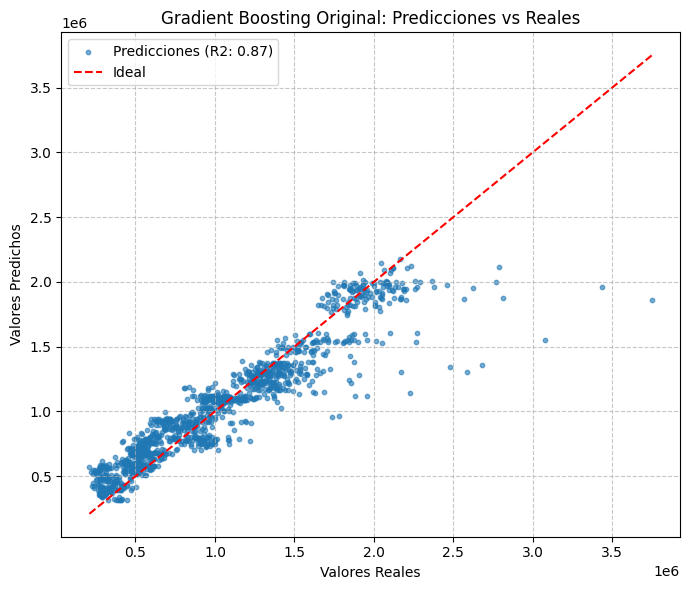

Gradient Boosting Ajustado - MSE Test: 36068064989.1878, R2 Test: 0.8828


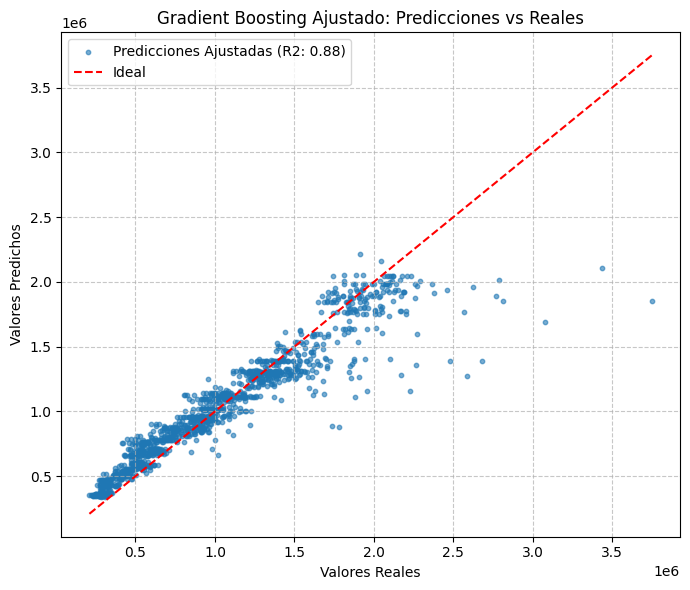

In [16]:
# Celda 3: GradientBoostingRegressor

print("\n--- GradientBoostingRegressor ---")

# 1. Desempeño inicial (o configuración estándar)
gb_original_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=semilla))
])
gb_original_pipeline.fit(X_train, y_train)
y_pred_gb_original = gb_original_pipeline.predict(X_test)
mse_gb_original = mean_squared_error(y_test, y_pred_gb_original)
r2_gb_original = r2_score(y_test, y_pred_gb_original)
print(f"Gradient Boosting Original - MSE Test: {mse_gb_original:.4f}, R2 Test: {r2_gb_original:.4f}")

# Gráfico de desempeño inicial
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_gb_original, alpha=0.6, s=10, label=f'Predicciones (R2: {r2_gb_original:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('Gradient Boosting Original: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Cambio de hiperparámetros (ej. reducir n_estimators, aumentar min_samples_leaf o max_depth para regularizar)
gb_ajustado_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', GradientBoostingRegressor(n_estimators=70, learning_rate=0.05, max_depth=5, random_state=semilla))
])
gb_ajustado_pipeline.fit(X_train, y_train)
y_pred_gb_ajustado = gb_ajustado_pipeline.predict(X_test)
mse_gb_ajustado = mean_squared_error(y_test, y_pred_gb_ajustado)
r2_gb_ajustado = r2_score(y_test, y_pred_gb_ajustado)
print(f"Gradient Boosting Ajustado - MSE Test: {mse_gb_ajustado:.4f}, R2 Test: {r2_gb_ajustado:.4f}")

# Gráfico de desempeño final
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_gb_ajustado, alpha=0.6, s=10, label=f'Predicciones Ajustadas (R2: {r2_gb_ajustado:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('Gradient Boosting Ajustado: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- XGBRegressor ---
XGBoost Original - MSE Test: 19942756228.6419, R2 Test: 0.9352


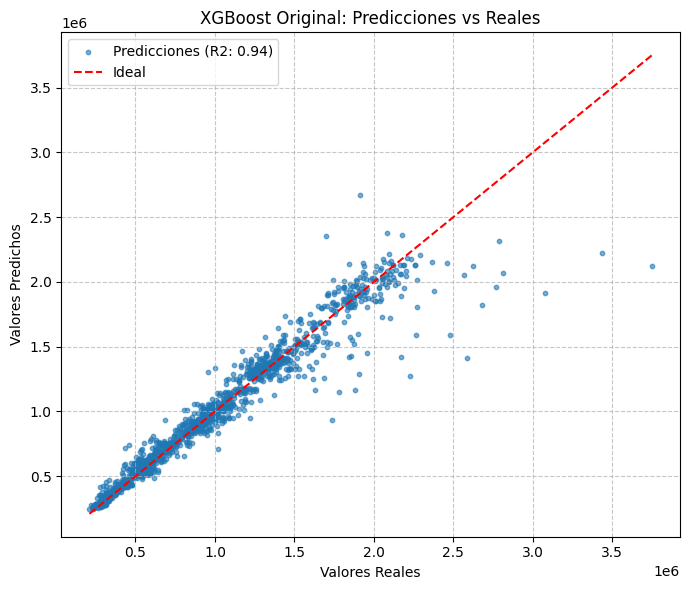

XGBoost Ajustado - MSE Test: 25036940254.5189, R2 Test: 0.9186


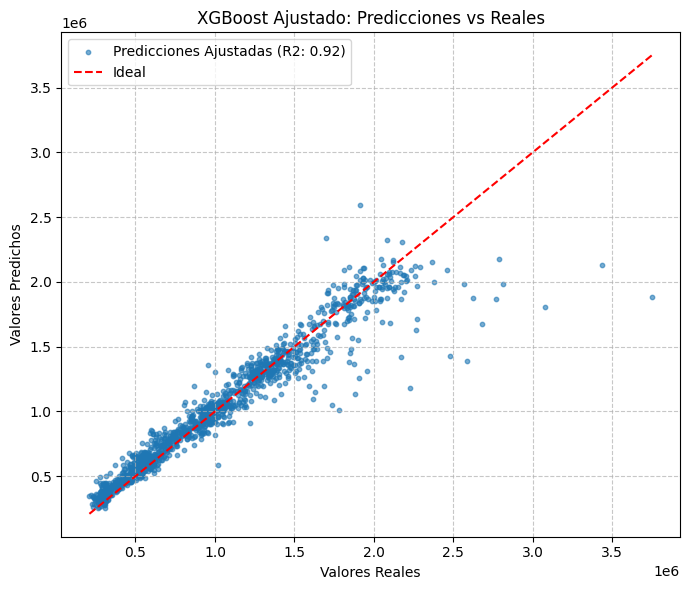

In [17]:
# Celda 4: XGBRegressor

print("\n--- XGBRegressor ---")

# 1. Desempeño inicial (o configuración estándar)
xgb_original_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=semilla))
])
xgb_original_pipeline.fit(X_train, y_train)
y_pred_xgb_original = xgb_original_pipeline.predict(X_test)
mse_xgb_original = mean_squared_error(y_test, y_pred_xgb_original)
r2_xgb_original = r2_score(y_test, y_pred_xgb_original)
print(f"XGBoost Original - MSE Test: {mse_xgb_original:.4f}, R2 Test: {r2_xgb_original:.4f}")

# Gráfico de desempeño inicial
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_xgb_original, alpha=0.6, s=10, label=f'Predicciones (R2: {r2_xgb_original:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('XGBoost Original: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Cambio de hiperparámetros (ej. reducir n_estimators, aumentar min_child_weight, aumentar subsample/colsample_bytree)
xgb_ajustado_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=80, learning_rate=0.08,
                                  max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=semilla))
])
xgb_ajustado_pipeline.fit(X_train, y_train)
y_pred_xgb_ajustado = xgb_ajustado_pipeline.predict(X_test)
mse_xgb_ajustado = mean_squared_error(y_test, y_pred_xgb_ajustado)
r2_xgb_ajustado = r2_score(y_test, y_pred_xgb_ajustado)
print(f"XGBoost Ajustado - MSE Test: {mse_xgb_ajustado:.4f}, R2 Test: {r2_xgb_ajustado:.4f}")

# Gráfico de desempeño final
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_xgb_ajustado, alpha=0.6, s=10, label=f'Predicciones Ajustadas (R2: {r2_xgb_ajustado:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('XGBoost Ajustado: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- RandomForestRegressor ---
Random Forest Original - MSE Test: 21969952735.4037, R2 Test: 0.9286


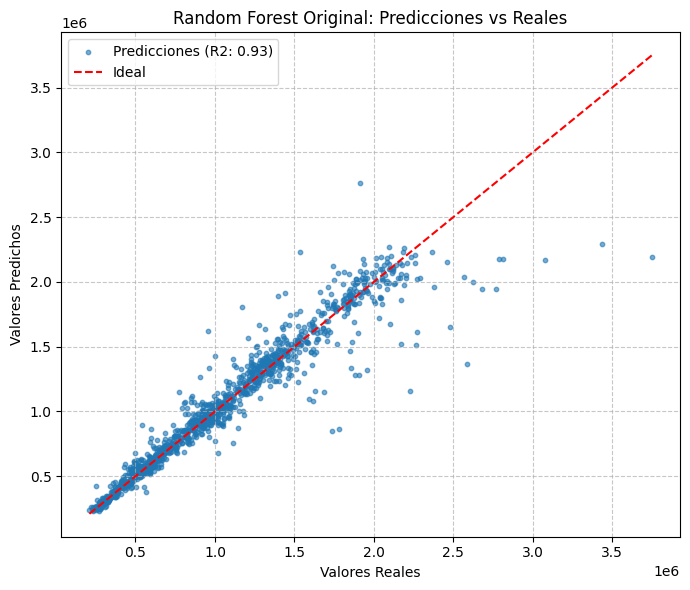

Random Forest Ajustado - MSE Test: 23278526268.7649, R2 Test: 0.9243


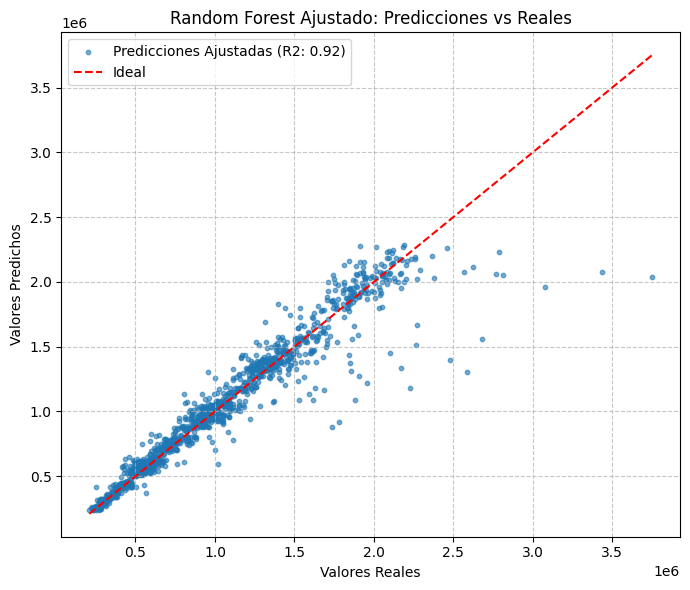

In [18]:
# Celda 5: RandomForestRegressor

print("\n--- RandomForestRegressor ---")

# 1. Desempeño inicial (o configuración estándar)
rf_original_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', RandomForestRegressor(n_estimators=100, random_state=semilla))
])
rf_original_pipeline.fit(X_train, y_train)
y_pred_rf_original = rf_original_pipeline.predict(X_test)
mse_rf_original = mean_squared_error(y_test, y_pred_rf_original)
r2_rf_original = r2_score(y_test, y_pred_rf_original)
print(f"Random Forest Original - MSE Test: {mse_rf_original:.4f}, R2 Test: {r2_rf_original:.4f}")

# Gráfico de desempeño inicial
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_rf_original, alpha=0.6, s=10, label=f'Predicciones (R2: {r2_rf_original:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('Random Forest Original: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Cambio de hiperparámetros (ej. reducir n_estimators, aumentar min_samples_leaf o max_depth para regularizar)
rf_ajustado_pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('regresor', RandomForestRegressor(n_estimators=80, max_depth=10, min_samples_leaf=5, random_state=semilla))
])
rf_ajustado_pipeline.fit(X_train, y_train)
y_pred_rf_ajustado = rf_ajustado_pipeline.predict(X_test)
mse_rf_ajustado = mean_squared_error(y_test, y_pred_rf_ajustado)
r2_rf_ajustado = r2_score(y_test, y_pred_rf_ajustado)
print(f"Random Forest Ajustado - MSE Test: {mse_rf_ajustado:.4f}, R2 Test: {r2_rf_ajustado:.4f}")

# Gráfico de desempeño final
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_rf_ajustado, alpha=0.6, s=10, label=f'Predicciones Ajustadas (R2: {r2_rf_ajustado:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('Random Forest Ajustado: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- Importancia de Características (RandomForestRegressor Ajustado) ---
           Feature  Importance
0           centro    0.708801
3              IPC    0.166370
1        desempleo    0.095786
4      temperatura    0.014900
2  precio_gasolina    0.013139
6        festivo_1    0.000508
5        festivo_0    0.000496


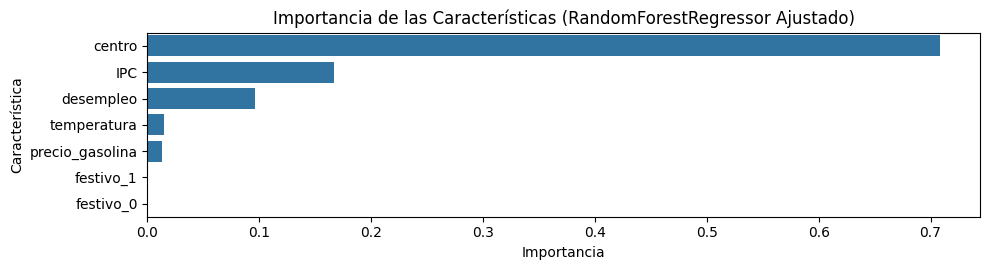

In [19]:
# Celda 6: Importancia de Características

print("\n--- Importancia de Características (RandomForestRegressor Ajustado) ---")

# Acceder al regresor dentro del pipeline y a las feature_importances_
# Es necesario reconstruir los nombres de las características después del OneHotEncoder

# Obtener las características transformadas del preprocesador
# Primero, ajustar el preprocesador a X_train para obtener los nombres de columnas correctos
preprocesador.fit(X_train)

# Nombres de las características numéricas
feature_names = nf[:]

# Nombres de las características categóricas transformadas (one-hot encoded)
if 'cat' in preprocesador.named_transformers_ and isinstance(preprocesador.named_transformers_['cat'], Pipeline):
    # Asegúrate de que el 'onehot' esté en el pipeline 'cat'
    onehot_encoder = preprocesador.named_transformers_['cat'].named_steps['onehot']
    # Manejar si get_feature_names_out no existe en versiones antiguas o si el encoder no se ha ajustado
    if hasattr(onehot_encoder, 'get_feature_names_out'):
        # Usar get_feature_names_out si está disponible
        encoded_feature_names = list(onehot_encoder.get_feature_names_out(cf))
    else:
        # Fallback para versiones antiguas o casos especiales
        # Esto puede no ser preciso si hay muchos valores categóricos o si las categorías tienen caracteres especiales
        encoded_feature_names = []
        for i, col in enumerate(cf):
            try:
                # Intenta obtener categorías para cada columna y construir nombres
                categories = onehot_encoder.categories_[i]
                encoded_feature_names.extend([f"{col}_{cat}" for cat in categories])
            except IndexError:
                # Si hay un error, simplemente usa un nombre genérico
                print(f"Advertencia: No se pudieron obtener los nombres de las categorías para '{col}'.")
                encoded_feature_names.extend([f"{col}_encoded_{j}" for j in range(len(onehot_encoder.categories_[i]))])


    feature_names.extend(encoded_feature_names)

# Si hay 'remainder=passthrough', se deben incluir las columnas no transformadas
# Sin embargo, en este setup, todas las 'predictoras' se procesan.

# Asegurarse de que el número de importancias coincida con el número de características
if len(feature_names) != len(rf_ajustado_pipeline.named_steps['regresor'].feature_importances_):
    print("Advertencia: El número de nombres de características no coincide con el número de importancias del modelo.")
    print(f"Nombres de características: {len(feature_names)}, Importancias: {len(rf_ajustado_pipeline.named_steps['regresor'].feature_importances_)}")
    # Como fallback, solo mostraremos las importancias sin nombres si hay un desajuste.
    feature_importances_values = rf_ajustado_pipeline.named_steps['regresor'].feature_importances_
    features_df = pd.DataFrame({'Feature_Index': range(len(feature_importances_values)), 'Importance': feature_importances_values})
    features_df = features_df.sort_values(by='Importance', ascending=False)
    print(features_df)
else:
    feature_importances = rf_ajustado_pipeline.named_steps['regresor'].feature_importances_
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    features_df = features_df.sort_values(by='Importance', ascending=False)
    print(features_df)

# Gráfico de Importancia de Características
plt.figure(figsize=(10, len(features_df) * 0.4))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importancia de las Características (RandomForestRegressor Ajustado)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()